## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?

**In regression you predict a continous numeric value such as price or temperature. On the other hand, with classification, you predict a category or label. Even if a classifir outputs a probability, the target is still considered categorical.**

2. What is a confusion table? What does it help us understand about a model's performance?

**A confusion table/matrix compares predicted labels vs true labels by counting outcomes like true positives, true negatives, flase positives, and false negatives. It helps to see what kinds of mistakes the model makes and supports metrics like accuracy, precision, and recall.**

3. What does the SSE quantify about a particular model?

**The Sum of Squared Errors (SSE) measures the total squared difference between predictions and true values in regression. Lower SSE means predictions are closer to the true values overall. By Squaring it, it penalizes larger errors more heavily.**

4. What are overfitting and underfitting? 

**In overfitting, the model fits the training data too closely to the point that it captures the noise, so it performs well on training but poorly on testing or new data. In underfitting, the model is too simple to capture the real patter, so it performs poortly on both training and test data.** 

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

**By splitting and choosing $k$ to evaluate accuracy or SSE on the test set, we are able to evaluate how well the model generalizes to unseen data. Picking $k$ using only training performance can lead to overfitting. Using a held-out test set help to choose a $k$ value that balances bias/variance and performs well past the training data.** 

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.


**Class label:**

**Strengths** - It realatively rsimple, easy to interpret, and be used directly to make decisions

**Weaknesses** - It hides uncertainty. It treats 51% vs 99% confidence exactly the same if the label is identical

**Probability distribution over class labels:**

**Strengths** - It can show us uncertainty. It lets us to adjust decision thresholds which is useful when costs differ (false negatives worse than false positives)

**Weaknesses** - Probabilites can be poorly calibrated and therefore be misleading. It's slightly more complicated to interpret.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [87]:
#Part 1: Importing the dataset and checking the columns

import pandas as pd

df = pd.read_csv("../data/USA_cars_datasets.csv")

df = df[["price", "year", "mileage"]] #keep variables of interest

#Simple check
print("Dimensions (rows, cols):", df.shape, '\n')
print("Missing values per column:")
print(df.isna().sum())

df.head()

Dimensions (rows, cols): (2499, 3) 

Missing values per column:
price      0
year       0
mileage    0
dtype: int64


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


Response for Question 1: 

After loading the dataset and keeping only the variables of intrest, the resulting datset has 2,499 observations and 3 variables. checking for missing values shows 0 NA's in price, year, and mileage, so no missing data handling is required. The first few rows confirm the variabels are present and numeric.

In [88]:
#Part 2: Normalization

#Max-Min normalization 
df['year_norm'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage_norm'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

#Just a quick check of the new columns
print(df[["year_norm", "mileage_norm"]].describe(), '\n')

df.head()

         year_norm  mileage_norm
count  2499.000000   2499.000000
mean      0.930091      0.051377
std       0.073248      0.058654
min       0.000000      0.000000
25%       0.914894      0.021088
50%       0.957447      0.034742
75%       0.978723      0.062354
max       1.000000      1.000000 



,price,year,mileage,year_norm,mileage_norm
0,6300,2008,274117,0.744681,0.269287
1,2899,2011,190552,0.808511,0.187194
2,5350,2018,39590,0.957447,0.038892
3,25000,2014,64146,0.872340,0.063016
4,27700,2018,6654,0.957447,0.006537


In [89]:
#Part 3: Train-test split

from sklearn.model_selection import train_test_split

#Split the sample:
X_train, X_test, y_train, y_test = train_test_split(df[["year_norm", "mileage_norm"]], df["price"], # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/20 test
                                                    random_state=100) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)



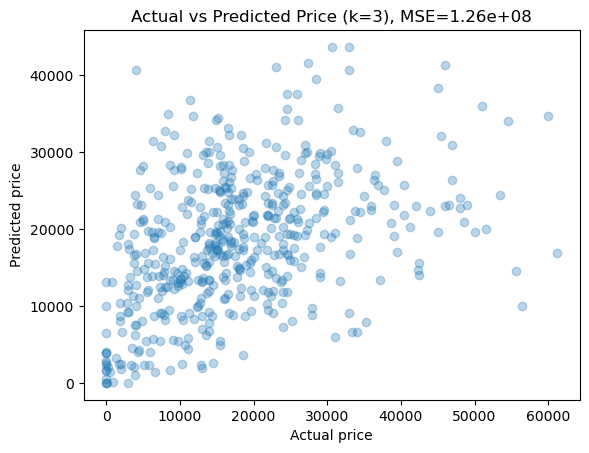

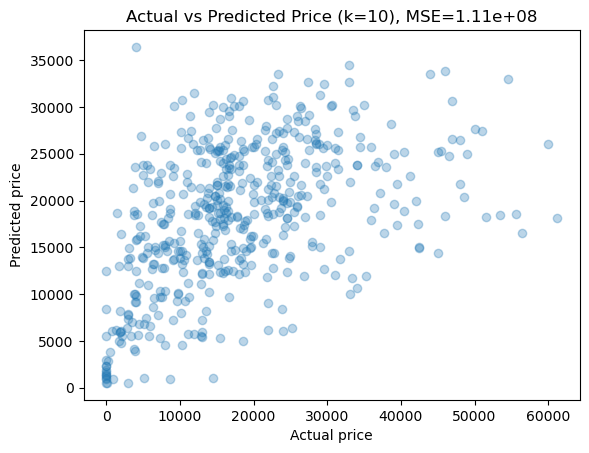

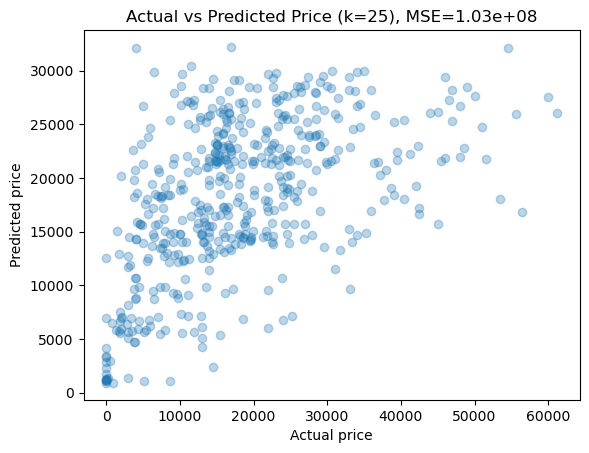

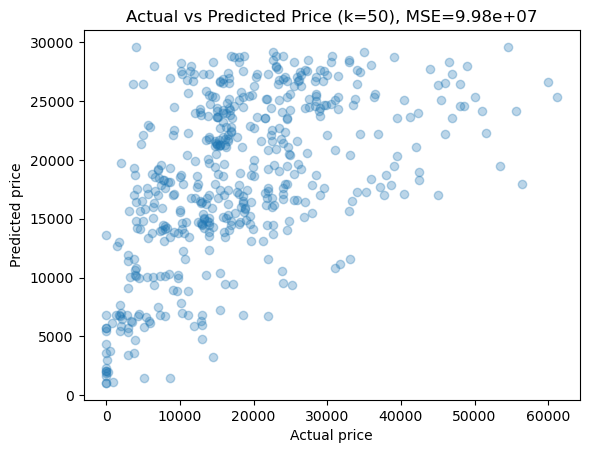

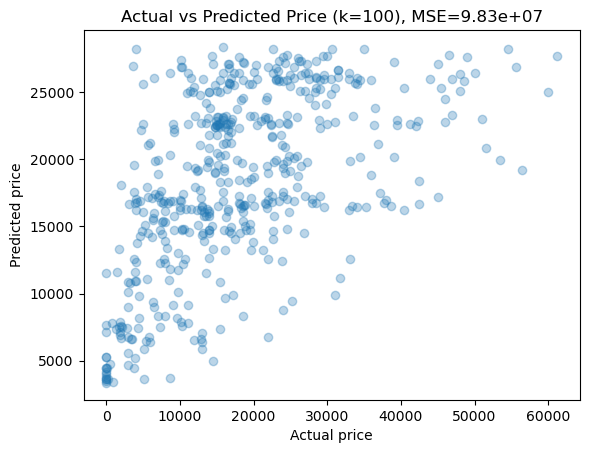

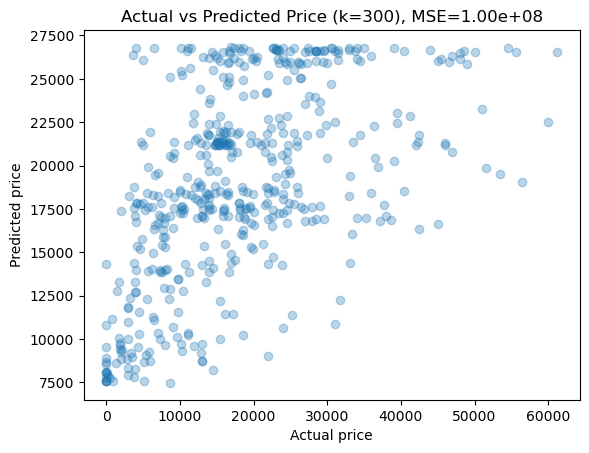

k values: [3, 10, 25, 50, 100, 300]
MSEs: [126039186.14355554, 110569645.43398, 103167039.08823678, 99757635.163556, 98276142.5601206, 100477298.914212]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#K values to try
k_list = [3, 10, 25, 50, 100, 300]

# Loop through k values, fit the model, predict, and calculate MSE
mse_list = []

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    # scatter: actual vs predicted
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("Actual price")
    plt.ylabel("Predicted price")
    plt.title(f"Actual vs Predicted Price (k={k}), MSE={mse:.2e}")
    plt.show()

print("k values:", k_list)
print("MSEs:", mse_list)

Response to Question 4:

As $k$ increases from 3 to 100, the test-set MSE decreases (from about 1.26x10^8 to 9.83x10^7), and the predicted-vs-actual scatter becomes less noisy. At k = 300, predictions are overly smoothed toward the average price and the MSE increases slightly, indicating loss of sensitivity to extremes. 

In [90]:
#Part 5: Finding the optimal k

import numpy as np

k_bar = 300 # Number of k's to try
SSE = [] # We'll store the SSE here 
SSE_on_train = [] # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[77]


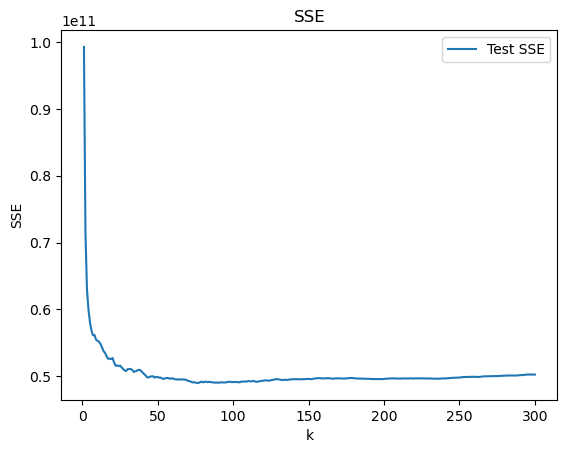

In [91]:
plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

Response to Question 5:

As $k$ increases from small values, test SSE falls sharply, reaches it minimum at k = 77 (optimal), and then flattens and slowly increases for larger k (increasing underfitting)

Response to Question 6:

With small k, predictions are based on very few neighbors, so they are highly sensitive to local noise and outliers, this produces more scatter in predicted vs. actual prices and corresponds to overfitting. 

As k increases, predictions become more stable because they average more neighbors, the predicted values track the actual values better overall and the test error decreases.

With very large k values, the model averages over too many points and becomes overly smooth, so predictions collapse toward a narrower range near the overall mean price, this is underfitting. and test error increases again. 

The optimal k (here k = 77) is where the model best balances overfitting and underfitting on the test set. 

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [ ]:
import pandas as pd

#Part 1: Importing the dataset and checking the columns

#import the zoo dataset
df2 = pd.read_csv("../data/zoo.csv")

#Quick check of the dataset
print("shape:", df2.shape, '\n')
print(df2.head(), '\n')

print(df2['class'].unique(), '\n')

#which animals are in each class 
for c in sorted(df2["class"].unique()):
    animals_in_class = df2.loc[df2["class"] == c, "animal"].tolist()
    print("\nClass", c, "- count:", len(animals_in_class))
    print(animals_in_class)

shape: (101, 18) 

     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1   

[1 4 2 7 6 5 3] 


Class

In [ ]:
#See the count of each class
class_counts = df2["class"].value_counts().sort_index()
print("\nClass counts:")
print(class_counts)

#Calculate feature prevalence and variation

#make a feature column exluding animal and class
feature_cols = [c for c in df2.columns if c not in ["animal", "class"]]

#For binary features the mean is the proportion of 1s 
feature_rates = df2[feature_cols].mean().sort_values(ascending=False)
print("\nFeature prevalence:")
print(feature_rates)

#standard deviation to measure variation 
feature_std = df2[feature_cols].std().sort_values(ascending=False)
print("\nFeature std dev:")
print(feature_std)


Class counts:
class
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: count, dtype: int64

Feature prevalence:
legs        2.841584
backbone    0.821782
breathes    0.792079
tail        0.742574
toothed     0.603960
eggs        0.584158
predator    0.554455
catsize     0.435644
hair        0.425743
milk        0.405941
aquatic     0.356436
airborne    0.237624
feathers    0.198020
fins        0.168317
domestic    0.128713
venomous    0.079208
dtype: float64

Feature std dev:
legs        2.033385
predator    0.499505
catsize     0.498314
hair        0.496921
eggs        0.495325
milk        0.493522
toothed     0.491512
aquatic     0.481335
tail        0.439397
airborne    0.427750
breathes    0.407844
feathers    0.400495
backbone    0.384605
fins        0.376013
domestic    0.336552
venomous    0.271410
dtype: float64


In [ ]:

#Calculate the mean for each feature by class
by_class_means = df2.groupby("class")[feature_cols].mean()
print(by_class_means)
by_class_range = (by_class_means.max() - by_class_means.min()).sort_values(ascending=False)

print("\nFeatures with biggest differences across classes (likely most predictive):")
print(by_class_range.head(10))

          hair  feathers     eggs  milk  airborne   aquatic  predator  \
class                                                                   
1      0.95122       0.0  0.02439   1.0   0.04878  0.146341  0.536585   
2      0.00000       1.0  1.00000   0.0   0.80000  0.300000  0.450000   
3      0.00000       0.0  0.80000   0.0   0.00000  0.200000  0.800000   
4      0.00000       0.0  1.00000   0.0   0.00000  1.000000  0.692308   
5      0.00000       0.0  1.00000   0.0   0.00000  1.000000  0.750000   
6      0.50000       0.0  1.00000   0.0   0.75000  0.000000  0.125000   
7      0.00000       0.0  0.90000   0.0   0.00000  0.600000  0.800000   

       toothed  backbone  breathes  venomous      fins      legs      tail  \
class                                                                        
1      0.97561       1.0       1.0  0.000000  0.097561  3.365854  0.853659   
2      0.00000       1.0       1.0  0.000000  0.000000  2.000000  1.000000   
3      0.80000       1.0      

Response to Question 1:

The seven classes are imblanced in size. Class 1 is the largest (41 animals) and classes 3 and 5 are the smallest with 5 and 4 animals respectively. Most covariates are binary, so variation can be interpreted using prevalence and standard deviation. Features like hair, milk, egges, toothed, predator, and catesize have relatively high variation (std near 0.5) while legs varies the most becuase it is not binary. Comparing feature means by class show strong distinguishing patterns. Overall the most predictive variables appear to be legs, milk, feathers, eggs, auqative, fins , beathes, toothed, backbone, and tail becuase they differ the most across classes.

In [ ]:
# Part 2: Train-test split

from sklearn.model_selection import train_test_split

#make a feature column exluding animal and class
feature_cols = [c for c in df2.columns if c not in ["animal", "class"]]

X = df2[feature_cols]
y = df2["class"]    

#to avoid the model falling apart, I will stratify to make it much less likely that one class ends up entirely in train or entirely in test

## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X, y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/20 test
                                                    random_state=100,
                                                    stratify=y) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

k_star: [1 2] best accuracy: 0.9411764705882353


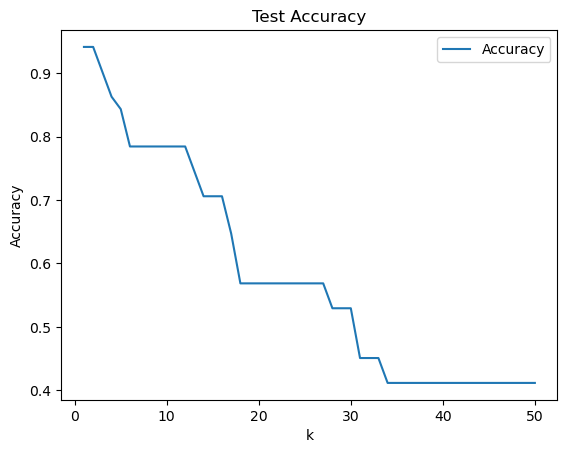

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


k_bar = min(100, len(X_train))   #safety
Acc = []

for k in range(1, k_bar + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    Acc.append(np.mean(y_hat == y_test))   #same as sum/ N_test

Acc_max = np.max(Acc)
k_star = np.where(np.array(Acc) == Acc_max)[0] + 1  # +1 b/c index starts at 0
print("k_star:", k_star, "best accuracy:", Acc_max)

#Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

## Accuracy plot:
plt.plot(np.arange(1,k_bar+1),Acc,label='Accuracy') 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

Response to Question 3:

I fit kNN classifiers for a range o k value (1-50) and evaluated test-set accurarcy on the 50% validation set. I selected the k that maximized accuracy. The accuracy was about 94.1%, achieved at k = 1 and k = 2, and I chose k = 1 as the simplest model among the ties.

In [ ]:
#Part 4: Evaluate the model

print("Accuracy:", (y_hat == y_test).mean())
pd.crosstab(y_test, y_hat, rownames=["Actual"], colnames=["Predicted"])

## Confusion matrix:
pd.crosstab(y_test,y_hat)


Accuracy: 0.9411764705882353


col_0,1,2,4,5,6,7
class,,,,,,
1,21,0,0,0,0,0
2,0,10,0,0,0,0
3,0,0,1,1,0,0
4,0,0,7,0,0,0
5,0,0,0,2,0,0
6,0,0,0,0,4,0
7,0,0,0,0,1,4


Response to Question 4:

I evaluated the optimal k-NN classifier (here, k=1) on the test set using a confusion table comparing predicted vs. actual class labels. The model achieves accuracy = 0.941 (48 correct out of 51 test observations). Most observations are classified correctly (large diagonal entries), but there are a few systematic mistakes. In particular, class 3 is never predicted on the test set (there is no “3” column), and the two class-3 test observations are misclassified as class 4 and class 5. This likely happens because class 3 is a very small group in the dataset and its feature patterns overlap with nearby classes, so the single nearest neighbor often belongs to a different class. The remaining error is one class 7 observation predicted as class 6, suggesting those two groups share similar feature combinations for that specific case, making them hard to separate under nearest-neighbor similarity.

In [ ]:
#Part 5: Using fewer features

#choose features
feat3 = ["milk", "aquatic", "airborne"] #new features
X3_train = X_train[feat3]
X3_test  = X_test[feat3]

#fit model (using the same k used before) 
k = 1
model3 = KNeighborsClassifier(n_neighbors=k)
model3.fit(X3_train, y_train)

#predict labels & confusion table:

y_hat3 = model3.predict(X3_test)
print("Accuracy:", np.mean(y_hat3 == y_test))

cm3 = pd.crosstab(y_test, y_hat3, rownames=["Actual"], colnames=["Predicted"])
print(cm3)

#predicted probabilities
proba = model3.predict_proba(X3_test)
proba_df = pd.DataFrame(proba, columns=model3.classes_)
print("\nClasses represented in predict_proba columns:", proba_df.columns.tolist())

#see a few rows of probabilities
proba_df.head()

Accuracy: 0.7254901960784313
Predicted   1  2  4  6
Actual                
1          21  0  0  0
2           0  8  0  2
3           0  0  1  1
4           0  0  7  0
5           0  0  2  0
6           0  3  0  1
7           0  0  3  2

Classes represented in predict_proba columns: [1, 2, 3, 4, 5, 6, 7]


,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Response to Question 5: 

Using only the three features milk, aquatic, and airborne with a k-NN classifier (k=1), test accuracy drops to 0.7255, which is much worse than the model using all variables. The confusion table shows that the model only predicts a subset of class labels as final predictions. It predicts classes 1, 2, 4, and 6, and it does not predict classes 3, 5, or 7 at all. This happens because with only three mostly binary features, many different classes share the same feature pattern (e.g., several classes may all have milk=0, aquatic=1, airborne=0), so the nearest neighbor vote collapses multiple true groups into a few dominant predicted groups. 

When I use predict_proba(X_test), the output includes probability columns for all seven classes ([1,2,3,4,5,6,7]), meaning all classes are still represented in the probability distribution. However, because k=1, the predicted probabilities are essentially 0 or 1 (the probability mass goes entirely to the class of the single nearest neighbor). As a result, even though probabilities are computed for all classes, classes 3, 5, and 7 never end up being the most probable class for any test observation, so they never appear as predicted labels in the confusion table.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [129]:
# Import sample dataset

# I chose the USA cars dataset because I thought it would be interesting to predict car prices based on the year and mileage.

df4 = pd.read_csv("../data/USA_cars_datasets.csv")

X = df4['price']  

## Some stats about X:
sd = np.std(X) # standard deviation of X
N = len(X) # number of observations

In [130]:
#Silverma's Plug-in Estimate of Bandwidth

def silverman_bandwidth(X, h=None): #Can either be user defined or computed from data

    # if user provides h, just use it
    if h is not None:
        return max(float(h), 1e-6)

    # otherwise compute from X
    X = np.asarray(X, dtype=float)
    X = X[np.isfinite(X)]
    N = len(X)
    sd = np.std(X, ddof=1)
    h_calc = 1.06 * sd * (N ** (-1/5))
    print("Calculated h is: ", h_calc)

    return max(h_calc, 1e-6)

#Kernel functions
def kernel(z, kernel_type="gaussian"): #The default is gaussian, z is standardized distance

    #k is lowercase to detect what user has defined
    k = kernel_type.lower()

    #evaluate kernel if gaussian, uniform, or epanechnikov (epa)
    if k == "gaussian":

        return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*z**2)
    
    elif k in ["uniform", "bump"]:

        return 0.5 * (np.abs(z) <= 1)
    
    elif k in ["epanechnikov", "epa"]:

        out = np.zeros_like(z, dtype=float) #This automatically handles when |z| > 1” part because we start with all zeros
        mask = (np.abs(z) <= 1) #true false mask for where |z| <= 1
        out[mask] = (3/4) * (1 - z[mask]**2)
        return out
    
    else:
        raise ValueError("kernel_type must be 'gaussian', 'uniform'/'bump', or 'epanechnikov'/'epa'.")
    

# KDE plot function and user preference for kernel and bandwidth
def kde_plot(X, kernel_type="gaussian", h=None, n_grid=200, ax=None, label=None):

    # clean X
    if isinstance(X, pd.Series):
        X = X.values 

    X = np.asarray(X, dtype=float) # always convert to numpy array for easier handling
    X = X[np.isfinite(X)] # drop missings and infs
    n = len(X)

    # bandwidth (default = Silverman)
    h_use = silverman_bandwidth(X, h=h)

    # grid to evaluate KDE
    xmin, xmax = X.min(), X.max() # find the range of the data

    extra = 0.05*(xmax - xmin) # add a little padding beyond the data range so the KDE curve doesn’t get cut off right at the min/max

    grid = np.linspace(xmin - extra, xmax + extra, n_grid) # make the grid for evaluation

    # KDE computation using broadcasting (faster and no loops)
    z = (grid[:, None] - X[None, :]) / h_use # shape (G, n)
    density = (1/(n*h_use)) * kernel(z, kernel_type=kernel_type).sum(axis=1) # sum over the n dimension to get density at each grid point

    # plot
    if ax is None:
        ax = plt.gca()

    ax.plot(grid, density, label=label if label else f"manual KDE ({kernel_type}, h={h_use:.3g})")
    ax.set_xlabel("x")
    ax.set_ylabel("density")

    return grid, density
    

Calculated h is:  2686.057353563531


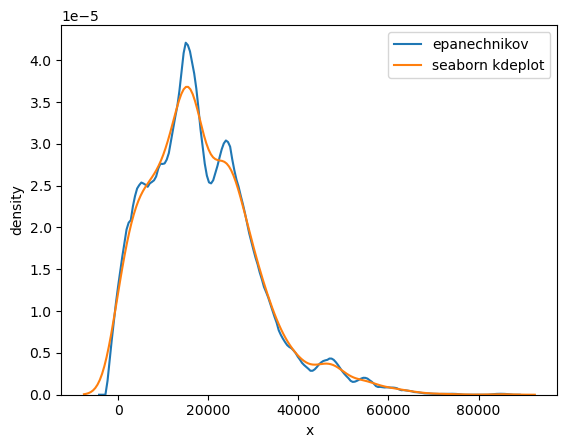

In [131]:
import seaborn as sns

# useing df["price"] from cars regression dataset

# User can tinker around here:
fig, ax = plt.subplots()
kde_plot(X, kernel_type="epa", h=None, ax=ax, label="epanechnikov") # Test Function

# Comparison only:
sns.kdeplot(X.dropna(), ax=ax, label="seaborn kdeplot")

# Show plot
ax.legend()
plt.show()